# Prosper Loan Data
## by Mahmoud Wasfy

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. We will focus on some of the features in the data set as indicated in below. 

In [1]:
# import warnings to ignore the warnings recieved 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
df = pd.read_csv('ProsperLoanData.csv')
print(df.shape)
df.tail()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
df.columns.tolist()

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (p

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

## What is the structure of your dataset?

> In the dataset we have 113937 rows and 81 columns. 

### What is/are the main feature(s) of interest in your dataset?

> We will focus on the only 18 features in the data set and I will briefly describe them here: 

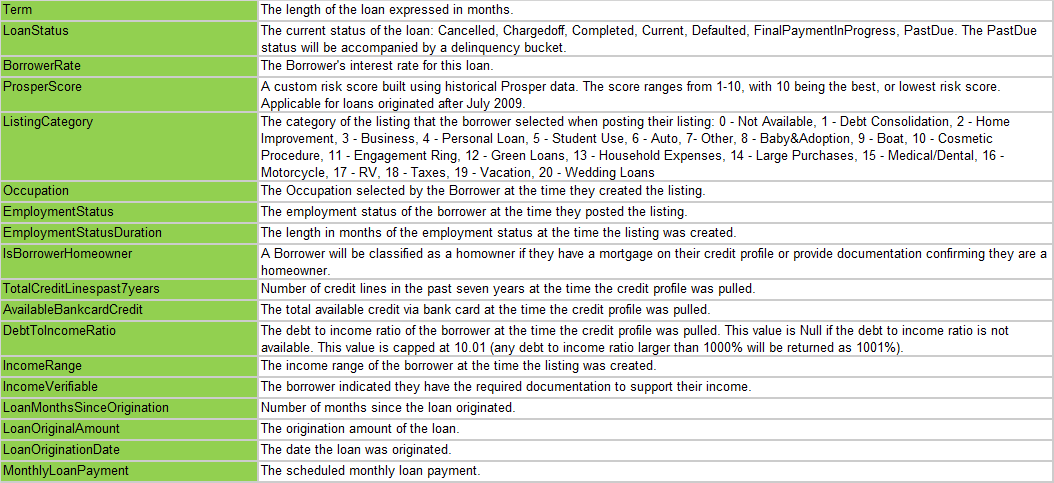

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> **Only the above stated features will be considered in the investigations and all other columns will be deleted from the dataset.**


In [7]:
df = df[['Term', 
'LoanStatus', 
'BorrowerRate', 
'ProsperScore', 
'ListingCategory (numeric)', 
'Occupation', 
'EmploymentStatus', 
'EmploymentStatusDuration', 
'IsBorrowerHomeowner', 
'TotalCreditLinespast7years', 
'AvailableBankcardCredit', 
'DebtToIncomeRatio', 
'IncomeRange', 
'IncomeVerifiable', 
'LoanMonthsSinceOrigination', 
'LoanOriginalAmount', 
'LoanOriginationDate', 
'MonthlyLoanPayment']] 


In [8]:
df.isna().sum()

Term                              0
LoanStatus                        0
BorrowerRate                      0
ProsperScore                  29084
ListingCategory (numeric)         0
Occupation                     3588
EmploymentStatus               2255
EmploymentStatusDuration       7625
IsBorrowerHomeowner               0
TotalCreditLinespast7years      697
AvailableBankcardCredit        7544
DebtToIncomeRatio              8554
IncomeRange                       0
IncomeVerifiable                  0
LoanMonthsSinceOrigination        0
LoanOriginalAmount                0
LoanOriginationDate               0
MonthlyLoanPayment                0
dtype: int64

In [9]:
df.dtypes

Term                            int64
LoanStatus                     object
BorrowerRate                  float64
ProsperScore                  float64
ListingCategory (numeric)       int64
Occupation                     object
EmploymentStatus               object
EmploymentStatusDuration      float64
IsBorrowerHomeowner              bool
TotalCreditLinespast7years    float64
AvailableBankcardCredit       float64
DebtToIncomeRatio             float64
IncomeRange                    object
IncomeVerifiable                 bool
LoanMonthsSinceOrigination      int64
LoanOriginalAmount              int64
LoanOriginationDate            object
MonthlyLoanPayment            float64
dtype: object

In [10]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [11]:
print(df.LoanOriginationDate.max())
print(df.LoanOriginationDate.min())

2014-03-12 00:00:00
2005-11-15 00:00:00


In [12]:
object_dtype = ['LoanStatus', 'Occupation', 'EmploymentStatus', 'IncomeRange', 'Term' ]

for item in object_dtype: 
    print(df[item].value_counts())

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64
Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64
Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         10

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

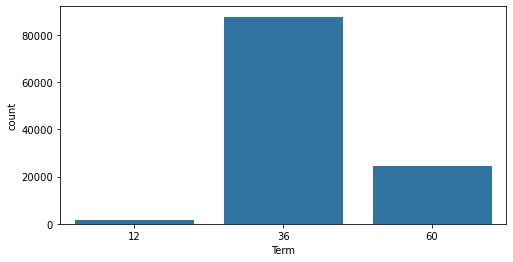

In [13]:
plt.figure(figsize=(8,4))
base_color = sb.color_palette()[0]
sb.countplot(df['Term'], color=base_color); 

> ### It is observed that most loans are paid over a duration of 36 Months and some of them are 60 Months and only few loans are paid back on 12 Months. It is not clear why there is no loans on 24 Months!?

In [14]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

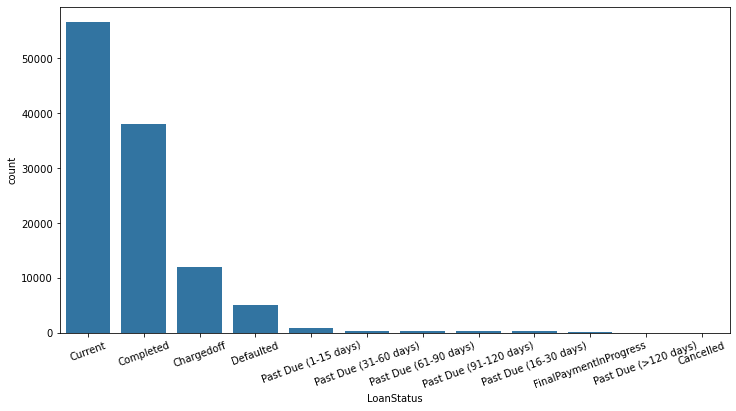

In [15]:
plt.figure(figsize=[12,6])

loan_status_order = df['LoanStatus'].value_counts().index
plt.xticks(rotation=20)

sb.countplot(x='LoanStatus', data =df, color=base_color, order=loan_status_order); 

> ### As seen in the figure above, most of the loans are still running as current loans followed by the completed loans. The data is right skewed and it seems that defaulted and past due loans are smaller numbers.  


>> To reduce the noise in the plot I will group the loans 'Past Due' to be (0-60 days), (60-120 days), (more than 120 days) and (Cancelled/Defaulted/Chargedoff)    


In [16]:
replace_list = ['Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Cancelled', 'Defaulted', 'FinalPaymentInProgress' , 'Chargedoff' ]
redu_list = ['Past Due (0-60 days)', 'Past Due (0-60 days)', 'Past Due (0-60 days)', 'Past Due (61-120 days)', 'Past Due (61-120 days)', 'Defaulted / Cancelled', 'Defaulted / Cancelled', 'Defaulted / Cancelled', 'Current', 'Defaulted / Cancelled' ]

print(len(replace_list))
print(len(redu_list))

10
10


In [17]:
df['LoanStatus'].replace(to_replace = replace_list , value = redu_list , inplace=True)


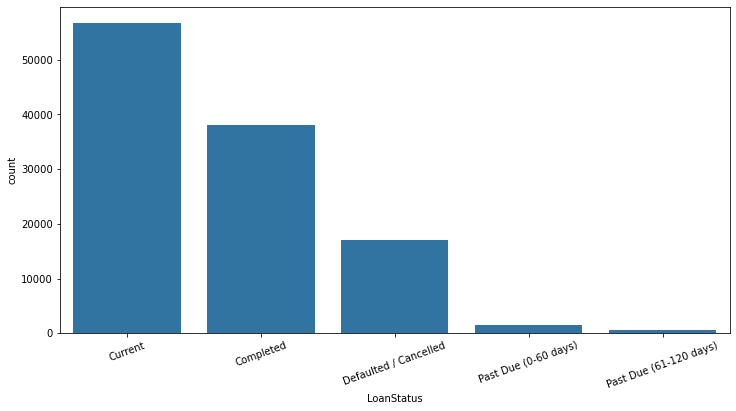

In [18]:
plt.figure(figsize=[12,6])

loan_status_order = df['LoanStatus'].value_counts().index
plt.xticks(rotation=20)

sb.countplot(x='LoanStatus', data =df, color=base_color, order=loan_status_order); 

> ### Now after clearing the Loan Status column and grouping past due loans we have a clearer plot showing that the current loans are higher in numbers followed by completed and surprinsingly the Defaulted / Cancelled loans are almost one third of the current loans.  

In [19]:
# This re-ordering for the loan status will be used in the multivariate exporation:  

Loan_status_order = ['Completed', 'Current', 'Past Due (0-60 days)', 'Past Due (61-120 days)','Defaulted / Cancelled'  ]
OrderedStatus = pd.api.types.CategoricalDtype(ordered = True, 
                                                  categories =  loan_status_order )
df['LoanStatus'] = df['LoanStatus'].astype(OrderedStatus)

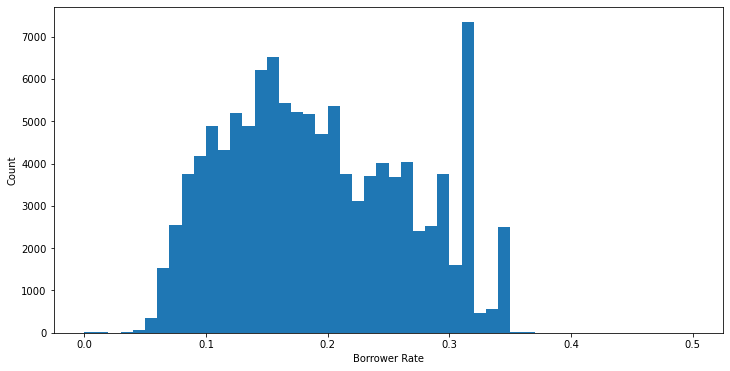

In [20]:
plt.figure(figsize=[12,6])
plt.hist(df['BorrowerRate'], bins = np.arange(0, df['BorrowerRate'].max()+0.01, 0.01))

plt.xlabel('Borrower Rate')
plt.ylabel('Count'); 

> ### The intrest rate varies from 0 to around 0.38% with a spike in loans with intrest above 0.3% but what affects the intrest rate? Is it related to other features in the dataset? 

In [21]:
print('ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.')
df['ProsperScore'].value_counts()


ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.


4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [22]:
df[df['ProsperScore']==11]

,Term,LoanStatus,BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,TotalCreditLinespast7years,AvailableBankcardCredit,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
9,36,Current,0.0629,11.0,7,Food Service,Employed,269.0,True,32.0,77696.0,0.25,"$25,000-49,999",True,3,10000,2013-12-12,305.54
69,60,Current,0.1139,11.0,1,Investor,Self-employed,12.0,True,21.0,5039.0,NaN,"$25,000-49,999",False,2,9000,2014-01-29,197.44
158,36,Current,0.0809,11.0,6,Tradesman - Mechanic,Employed,22.0,False,24.0,14737.0,0.05,"$75,000-99,999",True,1,5500,2014-02-14,172.58
224,36,Current,0.1099,11.0,1,Sales - Commission,Employed,114.0,True,41.0,103931.0,0.11,"$100,000+",True,2,30000,2014-01-15,982.02
236,36,Current,0.0605,11.0,1,Tradesman - Mechanic,Employed,105.0,True,33.0,62608.0,0.14,"$25,000-49,999",True,4,9000,2013-11-08,274.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113762,60,Current,0.1139,11.0,20,Other,Employed,41.0,True,24.0,18673.0,0.23,"$100,000+",True,4,25000,2013-11-27,548.44
113784,36,Current,0.0990,11.0,1,Other,Employed,158.0,True,48.0,5830.0,0.30,"$100,000+",True,4,15000,2013-11-14,483.30
113855,36,Current,0.1189,11.0,3,Food Service Management,Full-time,89.0,False,6.0,3616.0,0.07,"$75,000-99,999",True,1,8500,2014-02-25,281.88
113881,60,Current,0.1730,11.0,7,Professional,Employed,37.0,True,29.0,1123.0,0.29,"$75,000-99,999",True,5,19432,2013-10-23,486.06


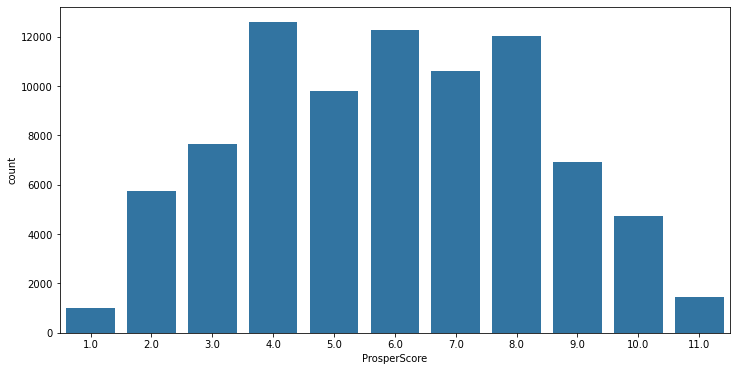

In [23]:
plt.figure(figsize=(12,6))
sb.countplot(x='ProsperScore', data=df, color=base_color); 

> ### Although the description of the variable (ProsperScore) shows that the values should range between 1 & 10 it is noticed that there are some rows showing a values of 11. It is not clear if this is a wrong inputs in data or it represents something that is not explained in the description. 

> ### In all cases the data shows a bell shaped curve with spikes at risk scores of 4, 6, 8.

''

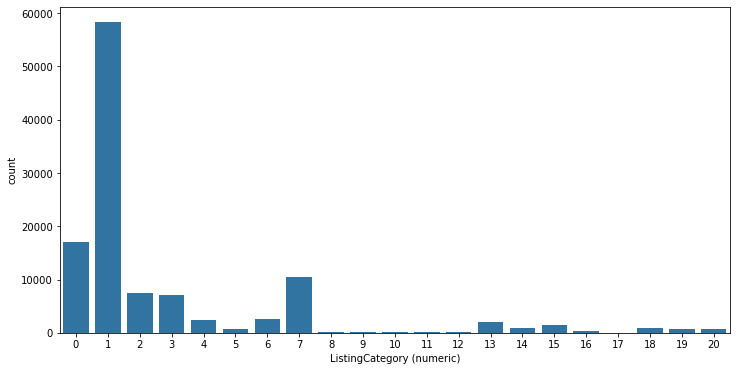

In [24]:
plt.figure(figsize=(12,6))
sb.countplot(x='ListingCategory (numeric)', data=df, color=base_color, )
dictianary= {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}
;

> ### In the above plot most of the loans in the dataset seems to be due to 'Debt Consolidation' followed by 'Home Improvement' and 'Business Loans' 

> ### Request to the Reviewer: I tried to replace the numeric values (0 - 20) in the x-axis with their Names using the dictianary above and xticks but it didn't work! I would appreciate if you let me know how to do this.  

In [25]:
# We need to replace values in Employment Status that have same meaning

# x, y represents the items to be changed and the changed list

x = ['Not available', 'Other', 'Self-employed', 'Part-time', 'Retired', 'Not employed']
y = ['Not Available', 'Not Available', 'Self-Employed & Part-Time', 'Self-Employed & Part-Time', 'Retired or Not Employed', 'Retired or Not Employed' ]

# Replace the items
df['EmploymentStatus'].replace(to_replace= x , value= y, inplace=True )


In [26]:

# Convert the column to a Categorial Dtype

Employment_Status_order = ['Employed', 'Full-time',  'Not Available', 'Self-Employed & Part-Time' ,'Retired or Not Employed'  ]

OrderedEmploymentStatus = pd.api.types.CategoricalDtype(ordered = True, categories =  Employment_Status_order )
df['EmploymentStatus'] = df['EmploymentStatus'].astype(OrderedEmploymentStatus)

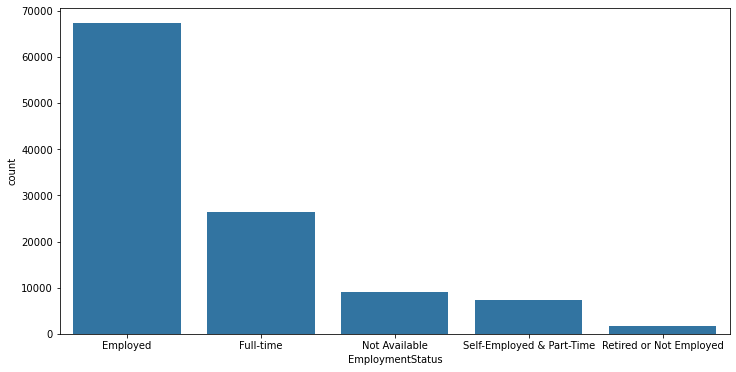

In [27]:
plt.figure(figsize=[12,6])
employment_status_order = df['EmploymentStatus'].value_counts().index
sb.countplot(x='EmploymentStatus', data=df, color=base_color, order=employment_status_order); 

> ### As expected most of the loans goes to employed / full time and few only goes to Not employed and retired individuals. 

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64


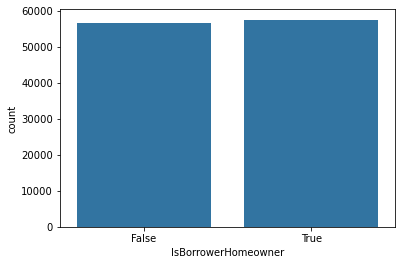

In [28]:
print(df.IsBorrowerHomeowner.value_counts())
sb.countplot(x='IsBorrowerHomeowner', data=df, color=base_color);

> ### This feature is not significant as Home Owners and Non-home-owners are almost equal in numbers, but does this affect the intrest rate they get? We can invistigate this in the bivariate exploration. 

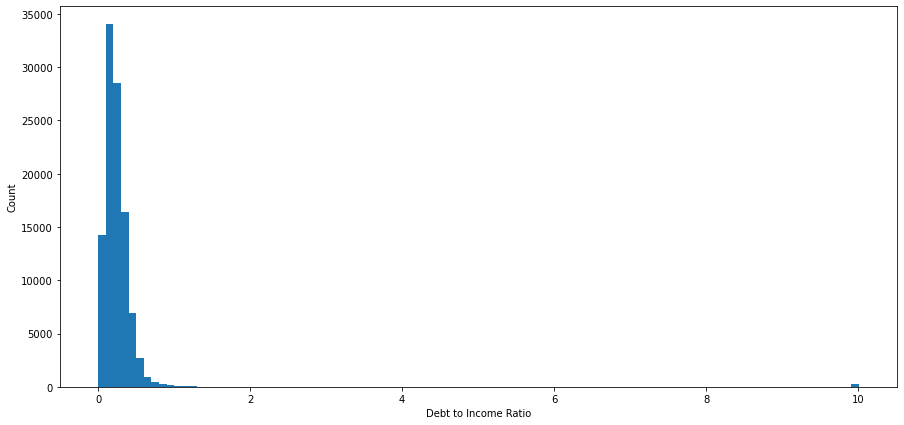

In [29]:
plt.figure(figsize=(15,7))

plt.hist(x='DebtToIncomeRatio', data=df, bins=100)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count');

In [30]:
df['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

> ### Here we notice some outliers that take the values of 'DebtToIncomeRatio' uptill 10 while the mean is 0.275947 an most values are in dicimal points. Lets see how many rows have values above 1.5

In [31]:
df[df['DebtToIncomeRatio'] > 1.5]

,Term,LoanStatus,BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,TotalCreditLinespast7years,AvailableBankcardCredit,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
22,36,Current,0.3134,2.0,1,Other,Not Available,68.0,False,18.0,4465.0,9.20,"$1-24,999",True,13,4000,2013-02-05,172.76
226,36,Completed,0.1000,NaN,0,Other,Full-time,9.0,True,47.0,49014.0,10.01,Not displayed,False,84,1000,2007-03-07,32.27
368,36,Completed,0.2000,NaN,0,Sales - Retail,Full-time,7.0,False,24.0,2177.0,1.65,"$1-24,999",True,82,16000,2007-05-15,594.62
576,36,Completed,0.0935,NaN,0,Homemaker,Retired or Not Employed,65.0,False,13.0,36908.0,10.01,"$1-24,999",False,83,1500,2007-04-25,47.94
626,36,Current,0.3177,4.0,1,Other,Employed,51.0,False,20.0,4955.0,10.01,"$1-24,999",True,25,2000,2012-02-23,86.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113258,60,Defaulted / Cancelled,0.2498,6.0,2,Nurse's Aide,Employed,172.0,True,23.0,6124.0,10.01,"$1-24,999",True,19,4000,2012-08-28,117.36
113367,36,Completed,0.3134,4.0,13,Other,Not Available,20.0,True,31.0,4409.0,2.53,"$1-24,999",True,8,2000,2013-07-08,86.38
113387,36,Completed,0.3500,2.0,7,Administrative Assistant,Employed,45.0,True,40.0,19473.0,2.38,"$25,000-49,999",True,39,1500,2010-12-02,67.85
113407,36,Completed,0.2365,NaN,4,Other,Full-time,25.0,True,50.0,777.0,2.16,"$1-24,999",True,73,1386,2008-02-15,54.12


> ### Only 555 rows have values over 1.5 and they will be excluded from the range in the plot to see the distribution.

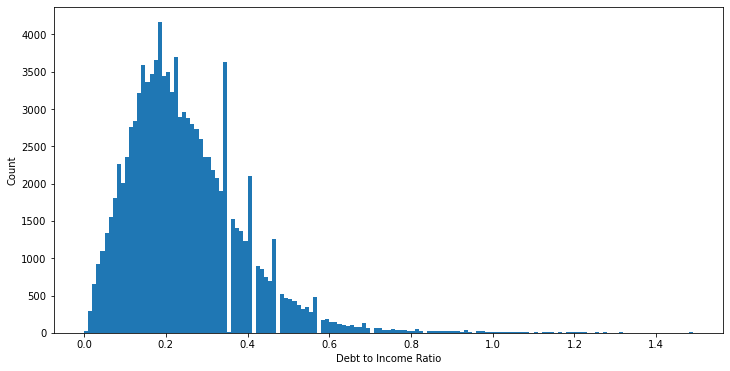

In [32]:
plt.figure(figsize=[12,6])

plt.hist(x='DebtToIncomeRatio', data=df, bins=np.arange(0, 1.5, 0.01), range=(0,1.5) )

plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count'); 

In [33]:
# Delete the outliers from the dataset completly. 
df = df[df['DebtToIncomeRatio'] < 1.5]

In [34]:
df['DebtToIncomeRatio'].describe()

count    104826.000000
mean          0.241856
std           0.142864
min           0.000000
25%           0.140000
50%           0.220000
75%           0.310000
max           1.490000
Name: DebtToIncomeRatio, dtype: float64

In [35]:
df['IncomeRange'].value_counts()

$25,000-49,999    29864
$50,000-74,999    29353
$100,000+         16069
$75,000-99,999    16014
Not displayed      7495
$1-24,999          5979
Not employed         52
Name: IncomeRange, dtype: int64

### We will replace 0 dollars with Not employed as they both have same meaning in order to eleminate unnecessary bars

In [36]:
# We need to replace values in income range that have same meaning

df['IncomeRange'].replace(to_replace= '$0', value='Not employed', inplace=True)
df['IncomeRange'].replace(to_replace= 'Not employed', value='Not displayed', inplace=True)

In [37]:
income_range_order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999' , '$75,000-99,999', '$100,000+', 'Not displayed']


In [38]:
# Convert the column to a Categorial Dtype

OrderedIncomeRange = pd.api.types.CategoricalDtype(ordered = True, 
                                                  categories =  income_range_order )
df['IncomeRange'] = df['IncomeRange'].astype(OrderedIncomeRange)

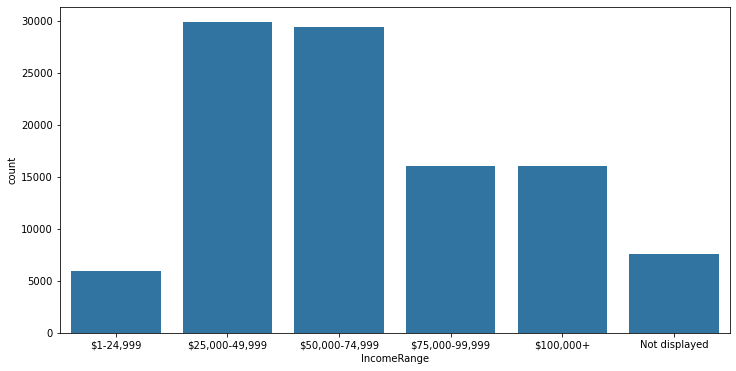

In [39]:
plt.figure(figsize=[12,6])

sb.countplot(x='IncomeRange', data=df, color=base_color, order=income_range_order); 


> ### I reordered the income bins and here we notice that most loans come from individuals that get an income between 25K and 75K usd 

In [40]:
df.IncomeVerifiable.value_counts()

True     104731
False        95
Name: IncomeVerifiable, dtype: int64

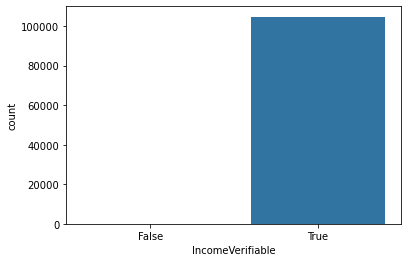

In [41]:
sb.countplot(x='IncomeVerifiable', data=df, color = base_color);

> ### Most loans are taken by individuals that verified thier income. This makes sense, the unverifiable borrowers are only 95! 

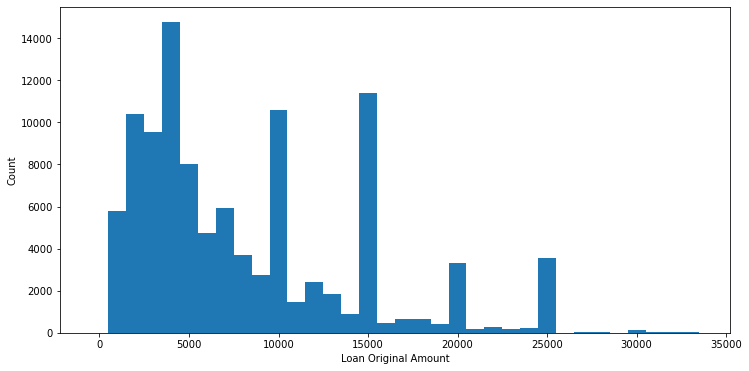

In [42]:
plt.figure(figsize=(12,6))
plt.hist(x='LoanOriginalAmount', data=df, bins=np.arange(0, df['LoanOriginalAmount'].max(), 1000), align='left')

plt.xlabel('Loan Original Amount')
plt.ylabel('Count'); 

> ### The loan amounts range from few hundreds to 25,000 USD with clear spikes at loan amounts of USD 5000, 10000, 15000, 20000, 25000) 

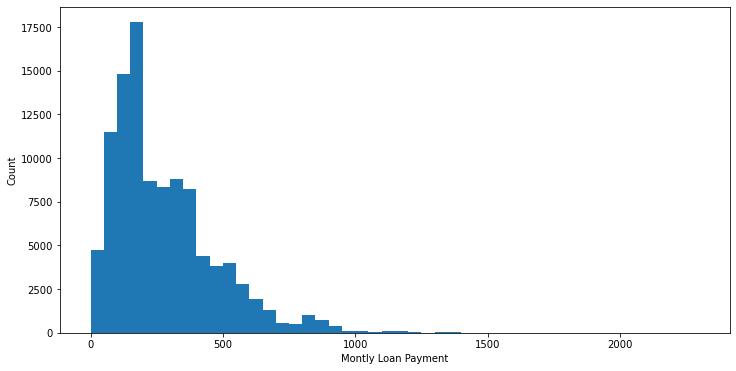

In [43]:
plt.figure(figsize=(12,6))
plt.hist(x='MonthlyLoanPayment', data=df, bins= np.arange(0, df['MonthlyLoanPayment'].max()+50, 50))

plt.xlabel('Montly Loan Payment')
plt.ylabel('Count');

> ### The Montly Loan Payment histogram is right skewed and it has a long tail to the right, we will use a log scale on the x-axis to better see the plot.

In [44]:
np.log10(df['MonthlyLoanPayment'].describe())

count    5.020469
mean     2.438596
std      2.288655
min          -inf
25%      2.119825
50%      2.343517
75%      2.571965
max      3.352474
Name: MonthlyLoanPayment, dtype: float64

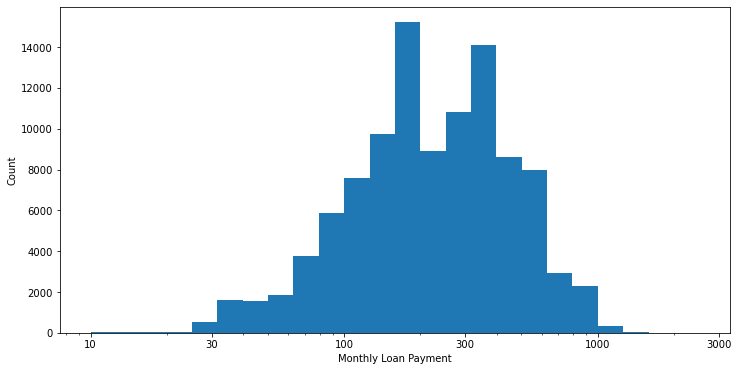

In [45]:
plt.figure(figsize=(12,6))
bins = 10** np.arange(1, 3.5, 0.1)

# making it a log scale to view the distribution in a better way
plt.xscale('log')
plt.xticks((10, 30, 100, 300, 1000, 3000),(10, 30, 100, 300, 1000, 3000) )
plt.hist(x='MonthlyLoanPayment', data=df, bins=bins)

# add some ploishing to the plot

plt.xlabel('Monthly Loan Payment')
plt.ylabel('Count');

> ### After transforming the x-axis to log scale the plot show the distribution of monthly loan payments that varry from 30 USD to more that 1000 USD / month and 2 spikes on the value of 200 USD and 500 USD. 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We only needed to make transformation to the x-axis in the last plot to be log scale of the Monthly Loan Payment. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some values were replaced and I had to delete some outliers as indicated in the above cells. Also columns such as Income Range were ordered.   

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [46]:
num_var = ['Term', 'BorrowerRate', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatusDuration','TotalCreditLinespast7years'
           ,'AvailableBankcardCredit', 'DebtToIncomeRatio', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'MonthlyLoanPayment']
bool_var = ['IsBorrowerHomeowner', 'IncomeVerifiable']
cat_var = ['LoanStatus', 'Occupation', 'EmploymentStatus', 'IncomeRange' ]

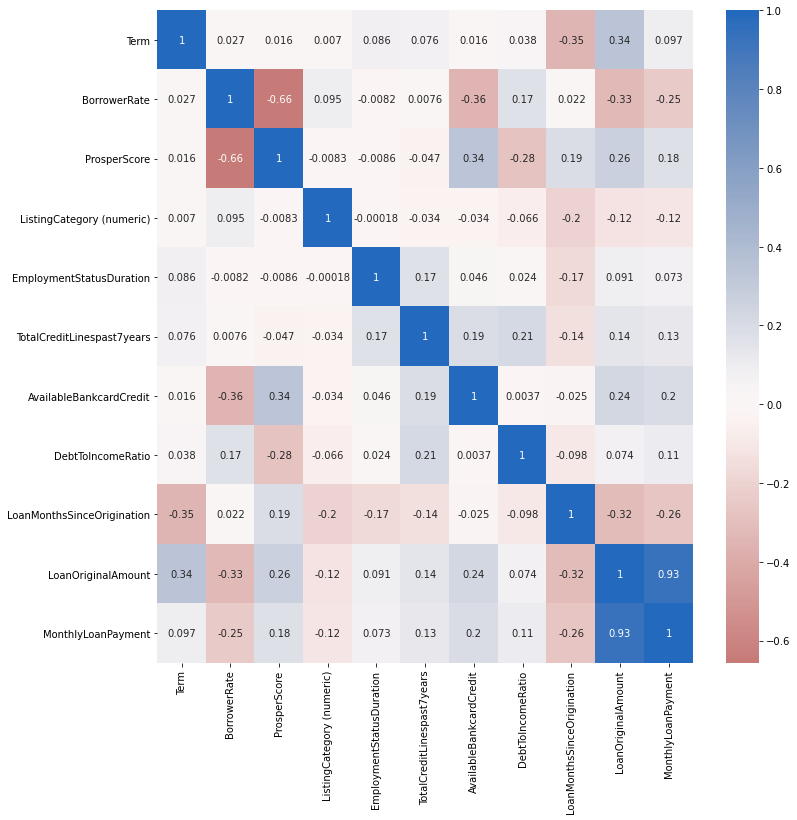

In [47]:
# To see the overall correlation between numerical features we will plot a heat map below. 

plt.figure(figsize=(12,12))
sb.heatmap(df[num_var].corr(), annot=True, fmt='.2g' , cmap = 'vlag_r', center = 0);

> ### As we can see in the heat map above, most of the features are not correlated. We only notice that high negative correlation between the Borrower Rate and the Prosper Score. The second correlation is between the Loan Original Amound and the montly loan payment and this one is expected. 

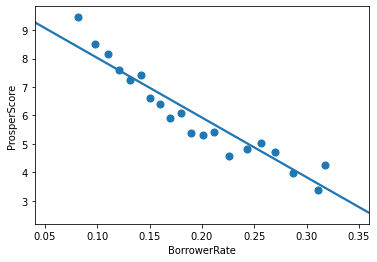

In [48]:
sb.regplot(data=df, x='BorrowerRate', y='ProsperScore', x_bins=20);

> ### The relationship between Borrower Rate and Prosper Score is inversely proportion as concluded from the heat map and the regretional plot above. 

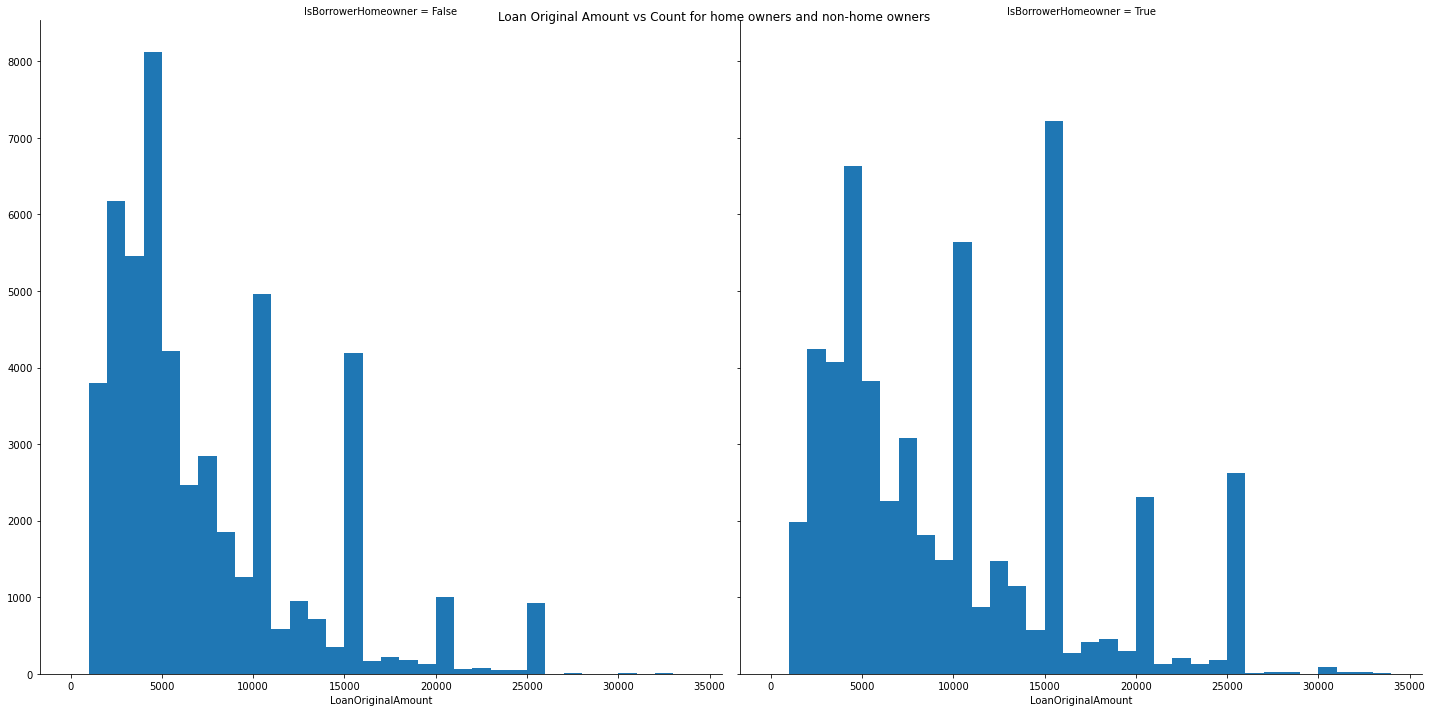

In [51]:

bin_edges = np.arange(0, 35000, 1000)
g = sb.FacetGrid(data=df, col='IsBorrowerHomeowner', height=10)
g.map(plt.hist, 'LoanOriginalAmount', bins=bin_edges)
plt.suptitle('Loan Original Amount vs Count for home owners and non-home owners ');

> ### We noticed in the above 2 plots that the counts of loans are much higher if the borrower is a home owner, but this is not true for loans with values of 5000 USD or lower! 

In [52]:
# To avoid having overplot in the next scatter plot, we will use only 10000 rows as a sample for the data. 

df_sample = df.sample(10000)

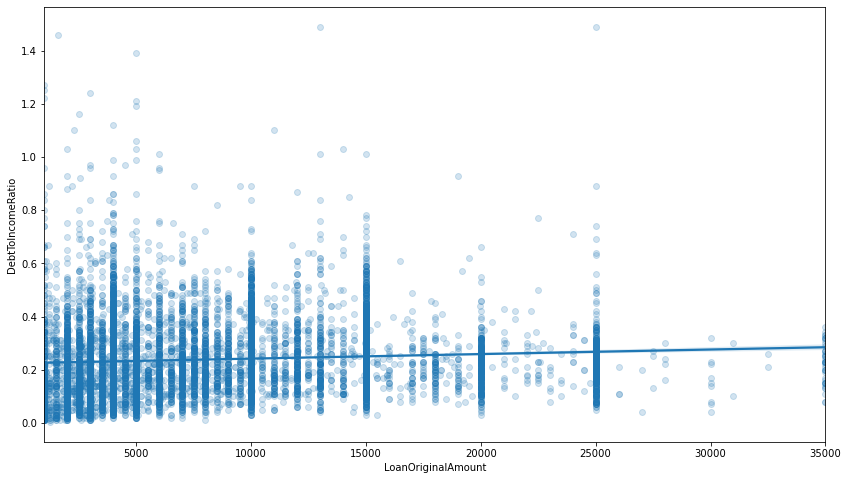

In [53]:
plt.figure(figsize=(14,8))
sb.regplot(x='LoanOriginalAmount', y = 'DebtToIncomeRatio', data=df_sample , scatter_kws={'alpha':0.2}); 

> ### There is a very small positive correlation between the Loan Original Amount and the Debt to Income Ratio. 

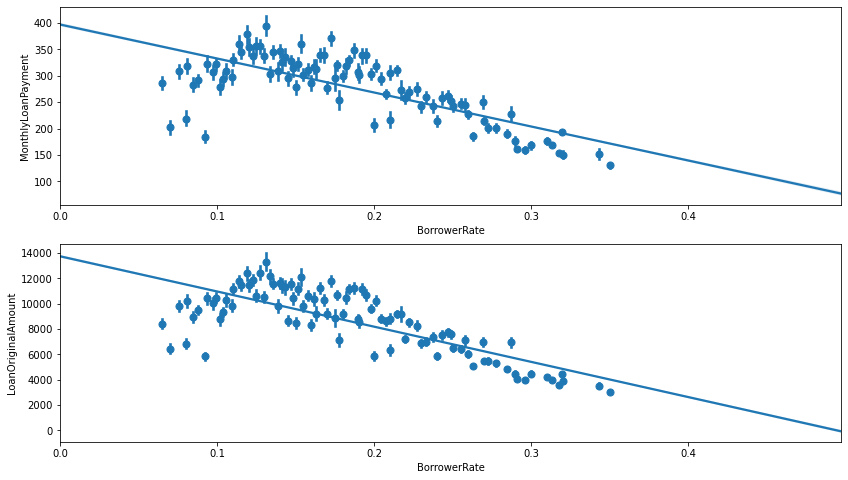

In [54]:
plt.figure(figsize=(14,8))

# First subplot shows the monthly loan payment agains the borrower rate
plt.subplot(2,1,1)
sb.regplot('BorrowerRate', 'MonthlyLoanPayment', data=df, x_bins=100  )

# Second subplot shows the loan amount agains the borrower rate
plt.subplot(2,1,2)
sb.regplot('BorrowerRate', 'LoanOriginalAmount', data=df, x_bins=100 ); 

> ### The above 2 plots shows the relationship between the Borrower rate and Monthly Loan Payment in the first plot and Loan Original Amount in the second plot. They both have a negative correlation with the borrower rate. 

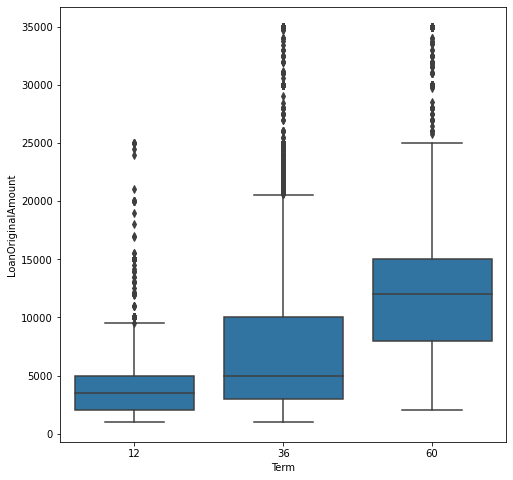

In [55]:
plt.figure(figsize=(8,8))

# We want to see the avarage loan amount against the term of payment 

sb.boxplot(x='Term', y = 'LoanOriginalAmount', data=df,  color=base_color); 

> ### Using a box plot to show the Loan Original Amount against the Term of payment which is either 12, 36, or 60 months. We notice that the mean value of the loan is increasing with the increase of the term of payment. 

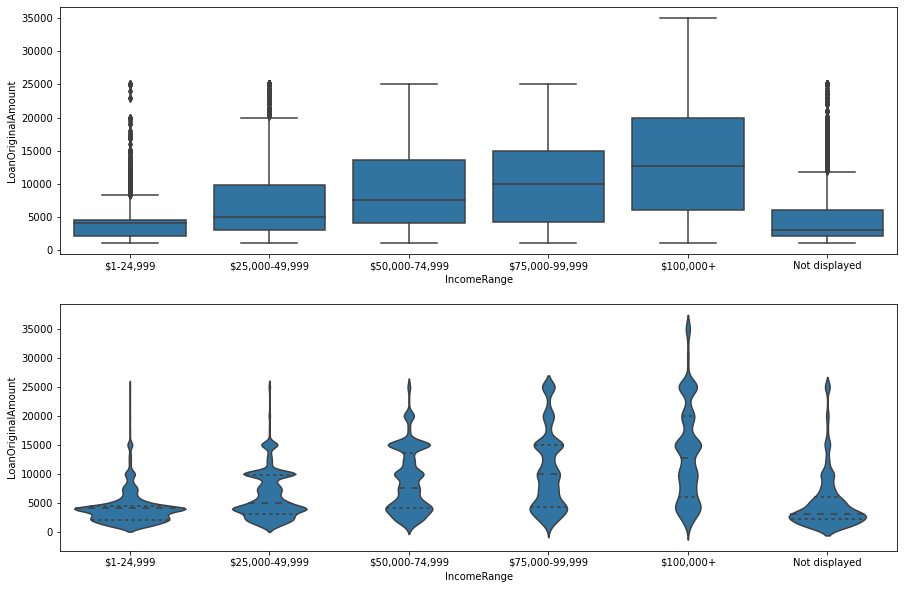

In [56]:
plt.figure(figsize=(15, 10))

# First subplot is a box plot for the income range and Loan original amount. 

plt.subplot(2,1,1)
sb.boxplot(x='IncomeRange', y = 'LoanOriginalAmount', data=df, order=income_range_order, color=base_color)


# Second subplot is a violine plot for the income range and Loan original amount. 

plt.subplot(2,1,2)
sb.violinplot(x='IncomeRange', y = 'LoanOriginalAmount', data=df, order=income_range_order, color=base_color, inner='quartile' ); 

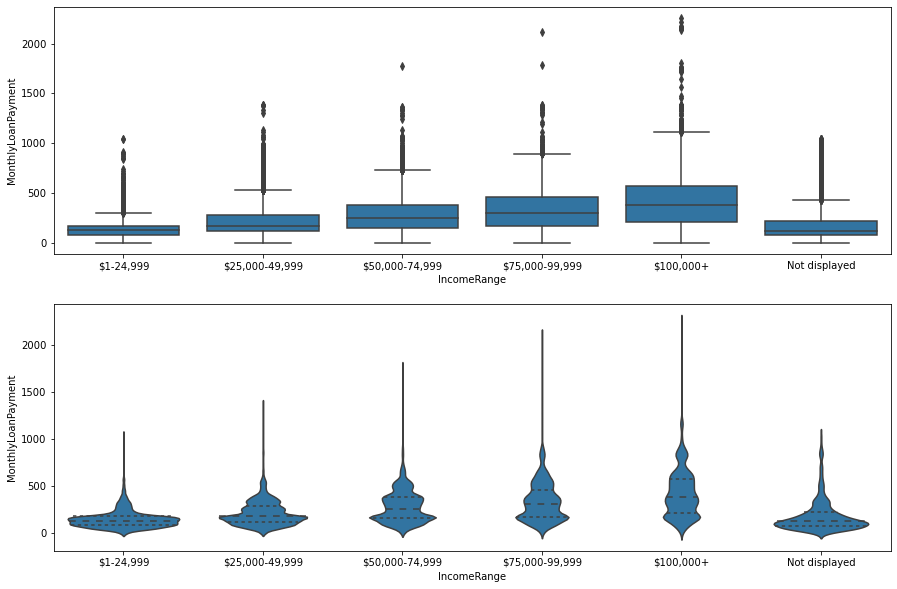

In [57]:
plt.figure(figsize=(15, 10))

# First subplot is a box plot for the income range and monthly payments. 

plt.subplot(2,1,1)
sb.boxplot(x='IncomeRange', y = 'MonthlyLoanPayment', data=df, order=income_range_order, color=base_color)

# Second subplot is a violine plot for the income range and monthly payments. 

plt.subplot(2,1,2)
sb.violinplot(x='IncomeRange', y = 'MonthlyLoanPayment', data=df, order=income_range_order, color=base_color, inner='quartile' ); 

> ### The above 4 plots shows that the mean value of the the 2 variables (Loan original amount) and (Monthly Loan Payment) is increasing with the increase of Income Range of the loan taker. This is expected! 

> ### From the violin plots we notice that the count of loans with smaller values decrease as the income range increase. 

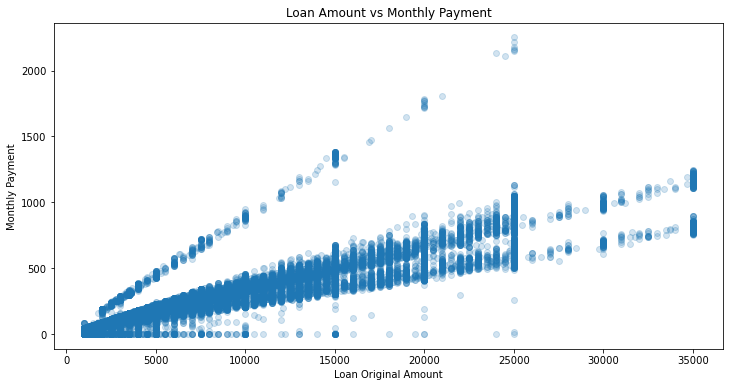

In [58]:
plt.figure(figsize=(12,6))


plt.scatter('LoanOriginalAmount','MonthlyLoanPayment', alpha= 0.2,  data=df )

# Polishing the plot with some labels

plt.title('Loan Amount vs Monthly Payment')
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Payment'); 

> ### The relationship between the Loan Original Amount nad the Monthly Loan Payment is directly proportional (positive correlation) but it seems that the pattern goes into 3 different lines (with different slopes), Maybe this is due to Term of payment that have 12, 36, 60 months. 

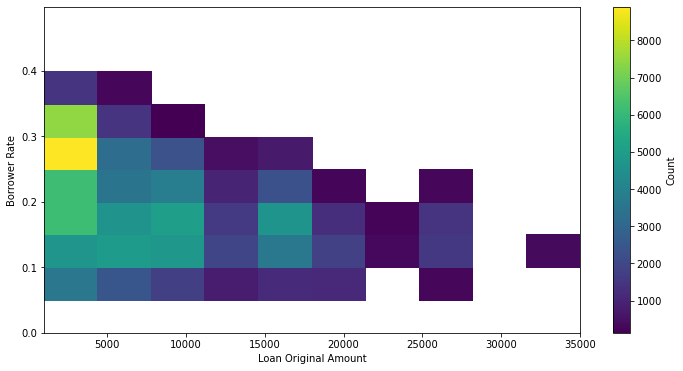

In [59]:
plt.figure(figsize=(12,6))

plt.hist2d('LoanOriginalAmount','BorrowerRate', data=df, cmin= 100, bins=(10, 10))

# Polishing the plot with some labels

plt.colorbar(label='Count')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Rate');


> ### The count of borrowers that have a rate between 0.15 and 0.35 are higher and it decreases as the loan amount increase. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this dataset the correlation between features is very low in most cases except what is stated below the heatmap. I combined some features to comeup with these plots in the bivariate exploration phase. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Below each plot I have added the observations of intrest between the features. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

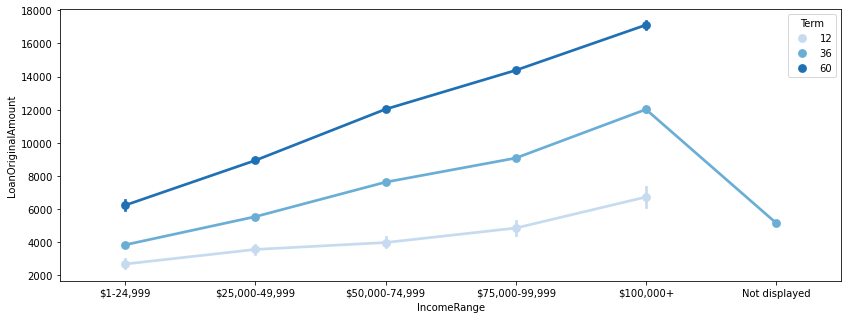

In [60]:
# Here we want to see the avarage loan amount for different income ranges and different terms of payment. 


plt.figure(figsize= (14,5))
sb.pointplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues' );



> ### The above point plot shows us the Loan Original amount in comparision to the income range for the borrower and we added a hue for the Term of payment (no. of months to payback the loan). It is clear that the loan amount increase as the income range increase and also as the term of payment increase. 

> ### It is also noticed that borrowers who are not employed or their employment status is not displayed are only eligible for the 36 months term payment. 

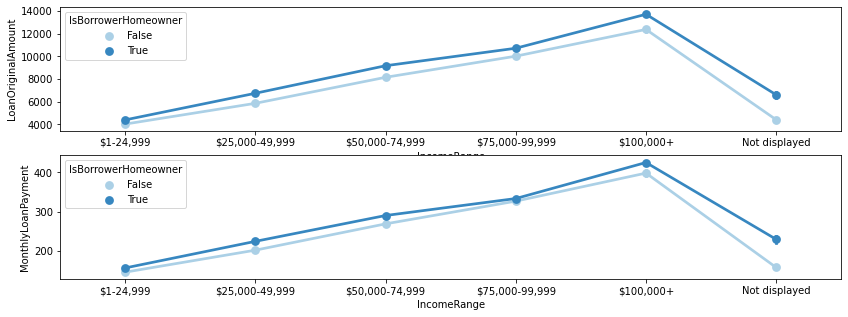

In [61]:
# We will use subplots to plot to graphs for the income range against the loan amount in the first and the montly payment 
# in the second. We also add hue to show different lines for the homeowners and non-homeowners. 


plt.figure(figsize= (14,5))

# First subplot for the loan original amount
plt.subplot(2,1,1)
sb.pointplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
           palette = 'Blues' )

# Second subplot for the loan Monthly payment
plt.subplot(2,1,2)
sb.pointplot(data = df, x = 'IncomeRange', y = 'MonthlyLoanPayment', hue = 'IsBorrowerHomeowner',
           palette = 'Blues' );

> ### The above figure shows the loan amount / monthly payment against the income range of the borrower and the third variable is either he is a home owner or not. Both plots are alomst similiar in shape, and also as expected, the borrower who is a home owner have higher loan amount & monthly payments. 

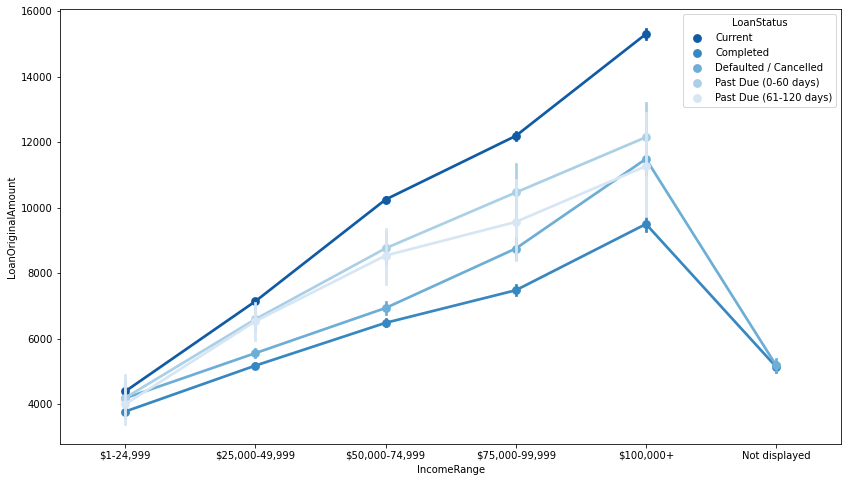

In [62]:
# Here we want to explore the loan amount against the income range for different loan statuses. 

plt.figure(figsize= (14,8))

sb.pointplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'Blues_r', linestyles='-' );

> ### In the above plot we also explore the Laon Original Amount against the income Ranges and we add a third variable for the loan status. It is noticable that the current loan have higher values in all income ranges and the completed loans have the lowest values in all income ranges. 

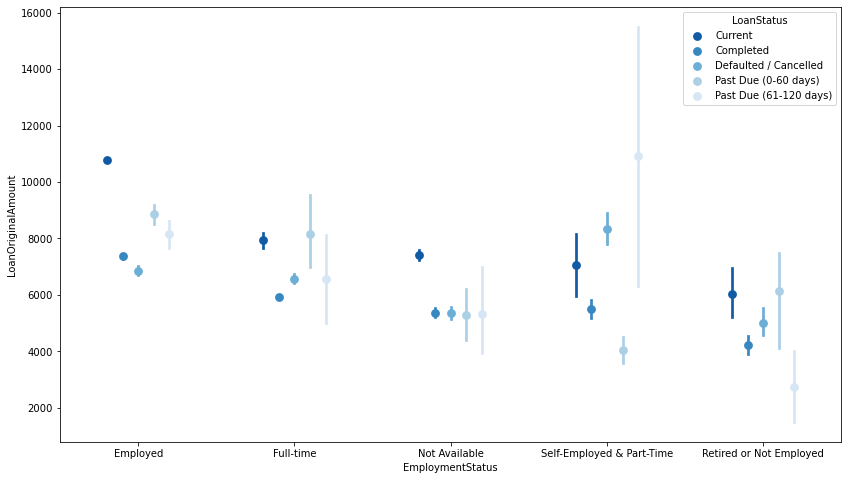

In [63]:
# Here we use a point plot to see the loan values against the employment status and show different colors for the loan status. 

plt.figure(figsize= (14,8))

sb.pointplot(data = df, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'Blues_r', linestyles='' , dodge = 0.4  );

> ### This plot shows the Employment Status against the Loan Original Amount and we added a hue as the loan status. We notice from the graph that most of the 'past due (61 -120) days' loans lie in the 'Self employed & part timers' with a very wide confidence interval. In all other employment statuses, it seems that the current loans have higher values than completed ones. 

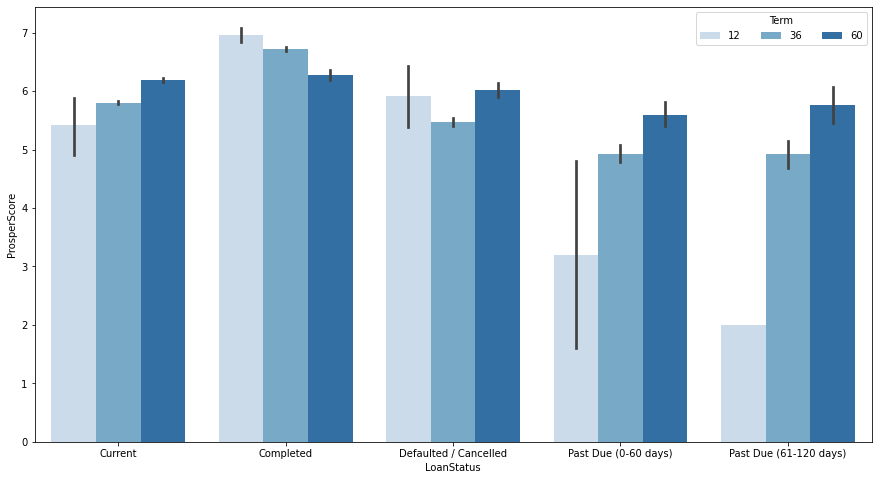

In [64]:
# Below we utilize a bar plot to explore the prosper score agains the loan status for different terms of payments. 

plt.figure(figsize=(15,8))
ax = sb.barplot(data = df, x = 'LoanStatus', y = 'ProsperScore', hue = 'Term', palette='Blues')
ax.legend(loc = 0, ncol = 3,  title = 'Term'); 


> ### This bar chart shows the avarage prosper score for different loan statuses adding a third variable of the term of payment to see different colored bars for each Term of payment. 

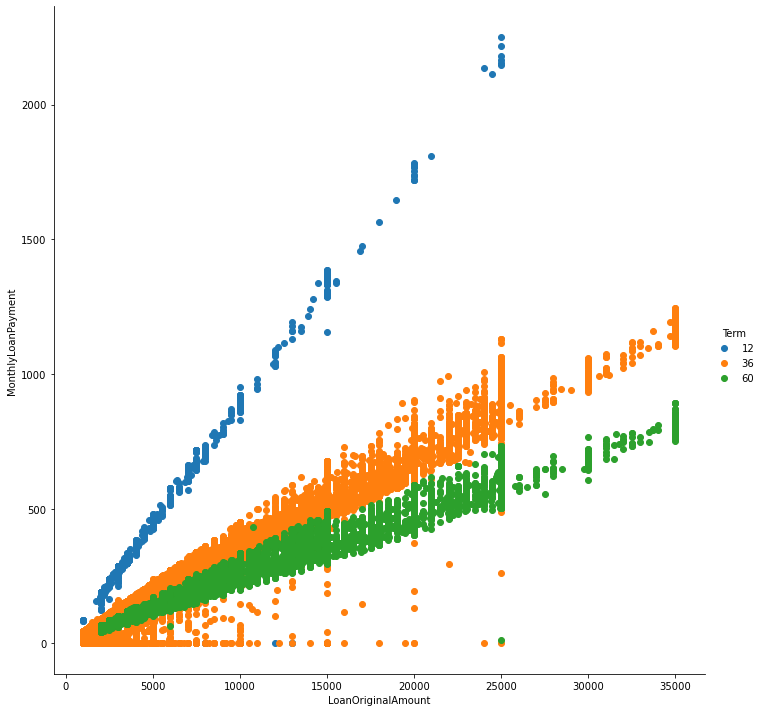

In [65]:
# Here we want to explore the loan amount against the monthly payment adding the term of payment as a third variable. 

g = sb.FacetGrid(data = df, hue = 'Term', height = 10)
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment')
g.add_legend();

> ### In the bivariate analysis we invistigated the positive correlation between the Loan Original Amount and the Monthly Loan Payment and we noticed the 3 different lines slopes, now here we add a third variable of  Term of payment to conclude that the slope depends on the payment term where the 12 months payment have the highest slope followed by the 36 months followed by the 60 months slope. 

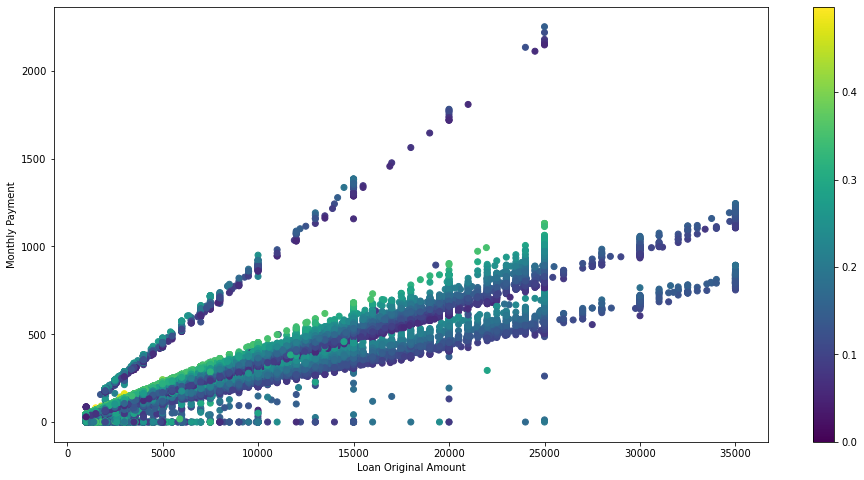

In [66]:
# As per the previous plot but the thrid variable is the borrower rate. 

plt.figure(figsize=(16,8))

plt.scatter('LoanOriginalAmount','MonthlyLoanPayment', c='BorrowerRate',  data=df  )

plt.colorbar()
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Payment'); 

> ### As in the previous plot, we are investigating the positive correlation between the loan original amount and the montly loan payment, but here we add a third variable which is the borrower rate. The borrower rate is a bit higher in case of the 36 months.  

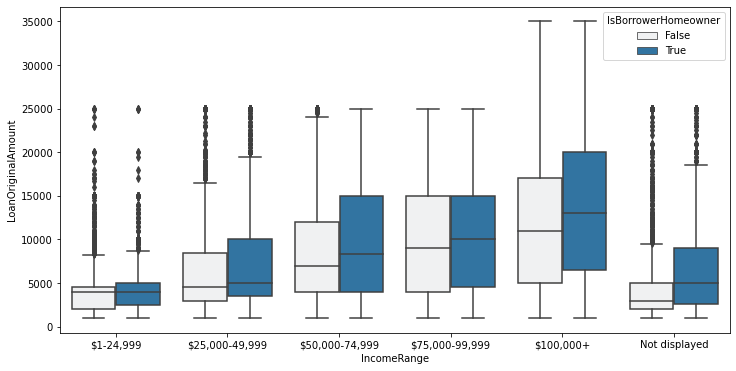

In [67]:
# Utilizing a box plot below to see the loan amount agains the income range for homeowners and non-homeowners. 


plt.figure(figsize=(12,6))

sb.boxplot(x='IncomeRange', y = 'LoanOriginalAmount', data=df, order=income_range_order, color=base_color, hue='IsBorrowerHomeowner'); 

> ### By plotting a box plot we see the mean values for loan amounts aginst the income range of the borrower and we added also a third variable if the borrower is a homeowner or not. It seems that the mean avarage loan amount is higher in case of homeowneres in all income ranges. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Below each plot I added the observations. 

### Were there any interesting or surprising interactions between features?

> Below each plot I added the observations. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!